<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center><b>Módulo 4 - Unidad 1 </b></center>
<center><b>Análisis Exploratorio de Datos</b></center>
<center><b>Caso Práctico - Ejercicios Parte 2</b></center>
<center><b>Adriana Vargas</b></center>

# 1.Exploración inicial

Cargamos el dataset, incluimos la opción `pd.set_option('display.max_rows', None)` dado que el dataset tiene 80 columnas y son truncadas por pandas para visualización.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

df_house = pd.read_csv('house_prices.csv', sep=',', index_col=0)
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,?,Reg,Lvl,AllPub,Inside,...,0,?,?,?,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,?,Reg,Lvl,AllPub,FR2,...,0,?,?,?,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,?,IR1,Lvl,AllPub,Inside,...,0,?,?,?,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,?,IR1,Lvl,AllPub,Corner,...,0,?,?,?,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,?,IR1,Lvl,AllPub,FR2,...,0,?,?,?,0,12,2008,WD,Normal,250000


El dataset tiene 1460 filas y 80 columnas.

In [ ]:
df_house.shape

(1460, 80)

Tipos de datos por columna:

In [ ]:
df_house.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical      

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

# 2.Depuración de datos

En esta etapa vamos a evaluar la existencia de valores nulos y valores duplicados.

## Valores duplicados

No se encontraron datos duplicados.

In [ ]:
df_house.duplicated(keep='first').sum()

0

## Valores nulos

No se encontraron datos nulos.

In [ ]:
df_house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Valores indeterminados ?

No hay datos nulos en el dataset, pero los datos indeterminados aparecen como '?', por lo que deberían tratarse:

In [ ]:
df_house.isin(['?']).sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

Text(0.5, 1.0, 'Missing values heatmap')

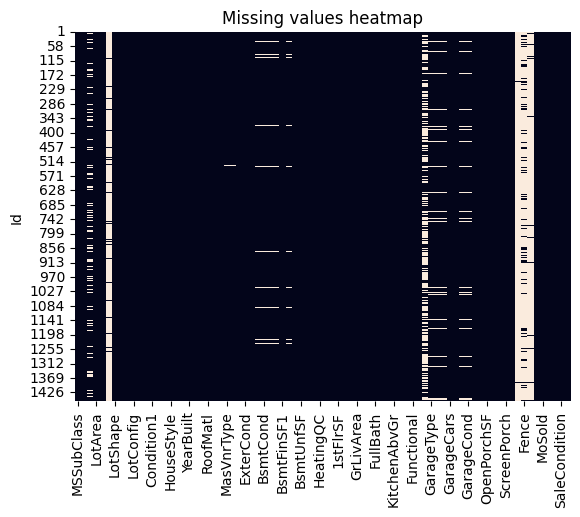

In [ ]:
sns.heatmap(df_house.isin(['?']), cbar = False).set_title("Missing values heatmap")

# 3.Depuración de indeterminados ?

De un total de 1460 filas, las columnas **Alley**, **PoolQC**, **Fence** y **MiscFeature** pueden ser eliminadas, dado que la mayoría de sus valores son indeterminados.

Para el resto de columnas, vamos a identificar si se trata de variables categóricas para reemplazar los valores indeterminados "?" con la moda, y si no es así, por facilidad finalmente vamos a convertir los valores indeterminados en nulos para poder tratarlos mejor.

### Remover columnas

Primero removemos las columnas con un alto volumen de valores ?.

In [ ]:
# Before
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,?,Reg,Lvl,AllPub,Inside,...,0,?,?,?,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,?,Reg,Lvl,AllPub,FR2,...,0,?,?,?,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,?,IR1,Lvl,AllPub,Inside,...,0,?,?,?,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,?,IR1,Lvl,AllPub,Corner,...,0,?,?,?,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,?,IR1,Lvl,AllPub,FR2,...,0,?,?,?,0,12,2008,WD,Normal,250000


In [ ]:
# Remove columns Alley, PoolQC, Fence and MiscFeature with a high volume of ? values.
df_house.drop(['Alley'], axis=1, inplace=True)
df_house.drop(['PoolQC'], axis=1, inplace=True)
df_house.drop(['Fence'], axis=1, inplace=True)
df_house.drop(['MiscFeature'], axis=1, inplace=True)

In [ ]:
# After
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_house.shape

(1460, 76)

### Variables categóricas

**MasVnrType** es una variable categórica, con moda "None".
Reemplazamos los valores ? con la moda.
"None" en este caso no se consideraría un valor nulo, es una categoría que hace referencia al caso fallback para esta variable.

In [ ]:
print(df_house['MasVnrType'].value_counts())
print(df_house['MasVnrType'].mode()[0])

df_house.loc[df_house["MasVnrType"].isin(['?']), 'MasVnrType'] = df_house['MasVnrType'].mode()[0]

None       864
BrkFace    445
Stone      128
BrkCmn      15
?            8
Name: MasVnrType, dtype: int64
None


**BsmtQual** es una variable categórica, con moda "TA".
Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['BsmtQual'].value_counts())
print(df_house['BsmtQual'].mode()[0])

df_house.loc[df_house["BsmtQual"].isin(['?']), 'BsmtQual'] = df_house['BsmtQual'].mode()[0]

TA    649
Gd    618
Ex    121
?      37
Fa     35
Name: BsmtQual, dtype: int64
TA


**BsmtCond** es una variable categórica, con moda "TA".
Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['BsmtCond'].value_counts())
print(df_house['BsmtCond'].mode()[0])

df_house.loc[df_house["BsmtCond"].isin(['?']), 'BsmtCond'] = df_house['BsmtCond'].mode()[0]

TA    1311
Gd      65
Fa      45
?       37
Po       2
Name: BsmtCond, dtype: int64
TA


**BsmtExposure** es una variable categórica, con moda "No".
Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['BsmtExposure'].value_counts())
print(df_house['BsmtExposure'].mode()[0])

df_house.loc[df_house["BsmtExposure"].isin(['?']), 'BsmtExposure'] = df_house['BsmtExposure'].mode()[0]

No    953
Av    221
Gd    134
Mn    114
?      38
Name: BsmtExposure, dtype: int64
No


**BsmtFinType1** es una variable categórica, con moda "Unf".
Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['BsmtFinType1'].value_counts())
print(df_house['BsmtFinType1'].mode()[0])

df_house.loc[df_house["BsmtFinType1"].isin(['?']), 'BsmtFinType1'] = df_house['BsmtFinType1'].mode()[0]

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
?       37
Name: BsmtFinType1, dtype: int64
Unf


**BsmtFinType2** es una variable categórica, con moda "Unf". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['BsmtFinType2'].value_counts())
print(df_house['BsmtFinType2'].mode()[0])

df_house.loc[df_house["BsmtFinType2"].isin(['?']), 'BsmtFinType2'] = df_house['BsmtFinType2'].mode()[0]

Unf    1256
Rec      54
LwQ      46
?        38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf


**Electrical** es una variable categórica, con moda "SBrkr". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['Electrical'].value_counts())
print(df_house['Electrical'].mode()[0])

df_house.loc[df_house["Electrical"].isin(['?']), 'Electrical'] = df_house['Electrical'].mode()[0]

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
?           1
Name: Electrical, dtype: int64
SBrkr


**FireplaceQu** es una variable categórica, con moda "Gd". Reemplazamos los valores ? con la moda.

*Nota*: Inicialmente la moda es "?", pero lo reemplazamos con el segundo valor más comun, que es "Gd".

In [ ]:
print(df_house['FireplaceQu'].value_counts())
print(df_house['FireplaceQu'].mode()[0])

df_house.loc[df_house["FireplaceQu"].isin(['?']), 'FireplaceQu'] = "Gd"

?     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
?


**GarageType** es una variable categórica, con moda "Attchd". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['GarageType'].value_counts())
print(df_house['GarageType'].mode()[0])

df_house.loc[df_house["GarageType"].isin(['?']), 'GarageType'] = df_house['GarageType'].mode()[0]

Attchd     870
Detchd     387
BuiltIn     88
?           81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd


**GarageFinish** es una variable categórica, con moda "Unf". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['GarageFinish'].value_counts())
print(df_house['GarageFinish'].mode()[0])

df_house.loc[df_house["GarageFinish"].isin(['?']), 'GarageFinish'] = df_house['GarageFinish'].mode()[0]

Unf    605
RFn    422
Fin    352
?       81
Name: GarageFinish, dtype: int64
Unf


**GarageQual** es una variable categórica, con moda "TA". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['GarageQual'].value_counts())
print(df_house['GarageQual'].mode()[0])

df_house.loc[df_house["GarageQual"].isin(['?']), 'GarageQual'] = df_house['GarageQual'].mode()[0]

TA    1311
?       81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA


**GarageCond** es una variable categórica, con moda "TA". Reemplazamos los valores ? con la moda.

In [ ]:
print(df_house['GarageCond'].value_counts())
print(df_house['GarageCond'].mode()[0])

df_house.loc[df_house["GarageCond"].isin(['?']), 'GarageCond'] = df_house['GarageCond'].mode()[0]

TA    1326
?       81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA


## Reemplazo de valores ? finales

Reemplazamos finalmente los valores indeterminados ? en las variables no categóricas por NaN, por facilidad.

In [ ]:
# Replace ? with NaN
df_house.loc[df_house["LotFrontage"].isin(['?']), 'LotFrontage'] = np.NaN
df_house.loc[df_house["MasVnrArea"].isin(['?']), 'MasVnrArea'] = np.NaN
df_house.loc[df_house["GarageYrBlt"].isin(['?']), 'GarageYrBlt'] = np.NaN

df_house.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

Finalmente confirmamos la inexistencia de valores indeterminados ?.

In [ ]:
df_house.isin(['?']).sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

# 4.Estadística descriptiva

Ahora vamos a explorar con describe la frecuencia de distribución de los datos.

In [ ]:
df_house.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_house[["Neighborhood"]].describe(include="all")

,Neighborhood
count,1460
unique,25
top,NAmes
freq,225


*   La media del precio de los inmuebles es de: 180921.19 USD, con un mínimo de 34900 USD y máximo de 755000 USD.
*   La media de las condiciones generales de los inmuebles OverallCond es 5.57, que en una escala de 1 a 10, son aceptables.
*   Similar a OverallCond, OverallQual, la calidad general está en una escala de 1 a 10, con una media de 6.099 aceptable.
*   La media de edad de construcción de los inmuebles es 1971, tenemos inmuebles en un amplio rango de edad, entre 1872 y 2010.
*   Los inmuebles están ubicados en 25 vecindarios diferentes.






array([[<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

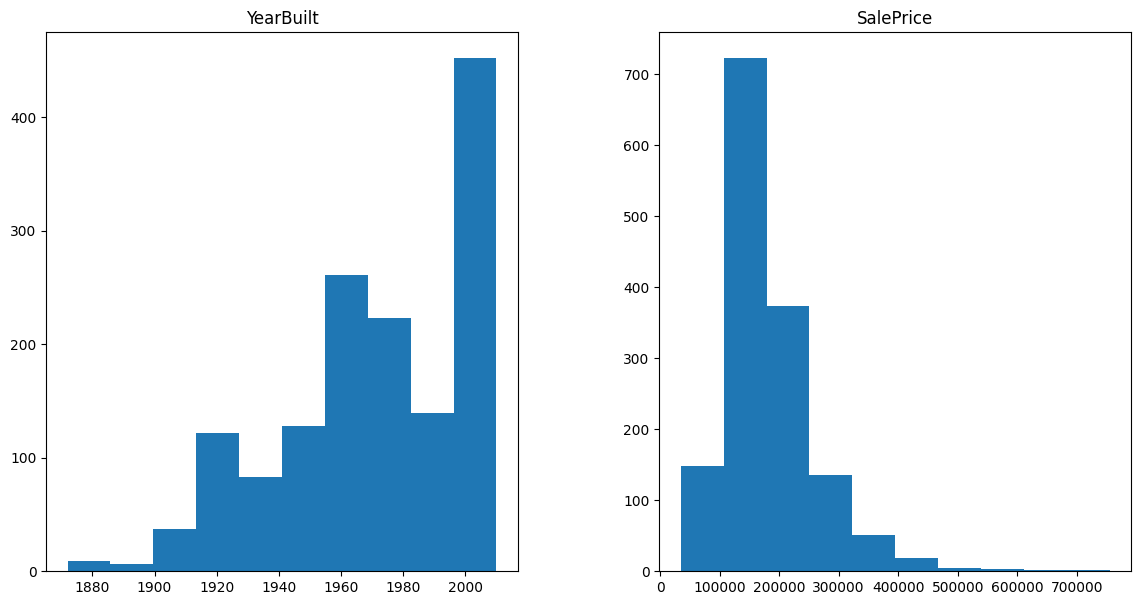

In [ ]:
df_house.hist(column=["YearBuilt","SalePrice"], bins=10, figsize=(14,7), grid=False)

array([[<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'OverallQual'}>]], dtype=object)

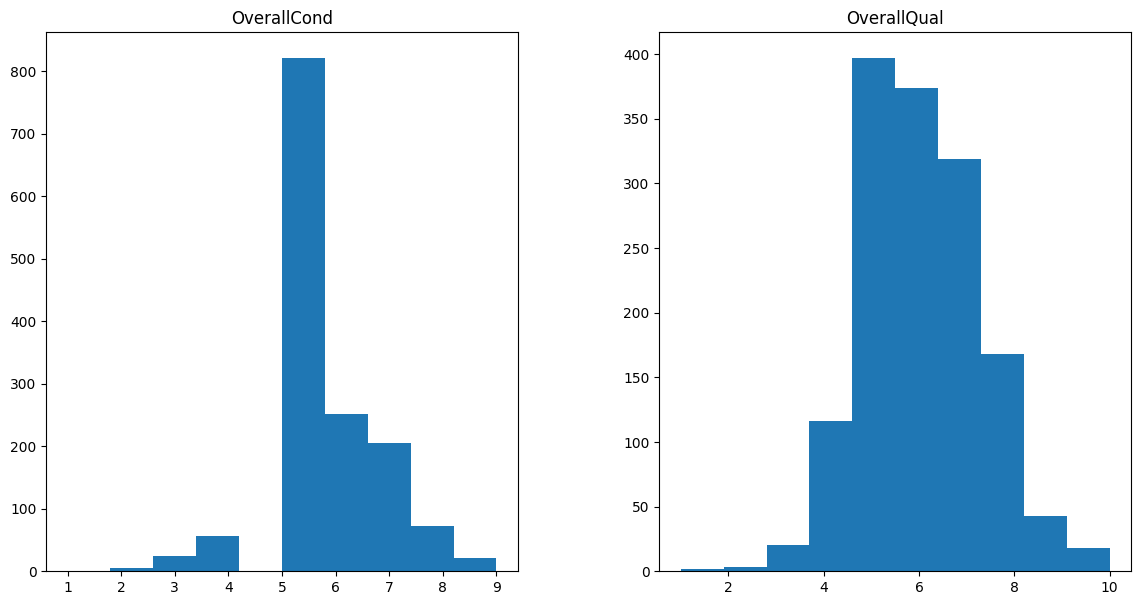

In [ ]:
df_house.hist(column=["OverallCond", "OverallQual"], bins=10, figsize=(14,7), grid=False)

# 5.Análisis Univariable SalePrice

Evaluamos primero el tipo de información de la columna **SalePrice**.

**SalesPrice** es una variable numérica, no categórica.

In [ ]:
df_house['SalePrice'].describe(include='all')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Ahora generamos el gráfico de la función de densidad de probabilidad:

<Axes: ylabel='Density'>

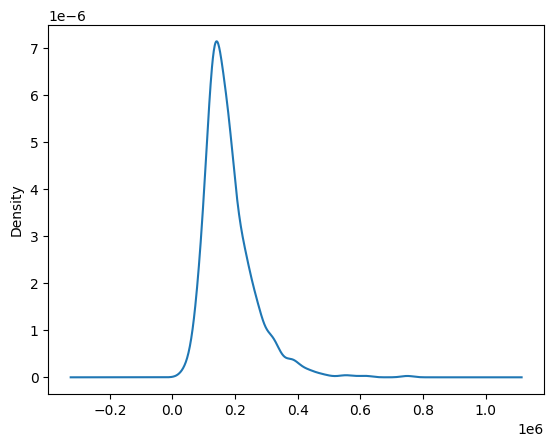

In [ ]:
df_house.SalePrice.plot(kind="kde")

Ahora generamos el gráfico de cajas:

<Axes: >

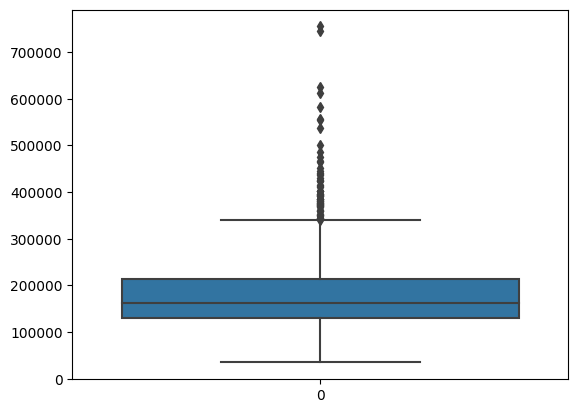

In [ ]:
data = df_house['SalePrice'].values.tolist()
sns.boxplot(data)

- Los **puntos** marcan los outliers o valores atípicos, es decir todo aquello que está fuera del rango intercuartil.
- Vemos que los valores atípicos se encuentran por encima aproximadamente de los 350000 USD.
- Los **bigotes o whiskers** representan el máximo y el mínimo es decir el cuartil 1 y cuartil 4.
- Los 3 primeros cuartiles están por debajo de los 214000 USD.

# 6.Análisis Univariable SaleCondition

Evaluamos primero el tipo de información de la columna **SaleCondition**.

**SaleCondition** es una variable categórica.

In [ ]:
df_house["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Histograma:

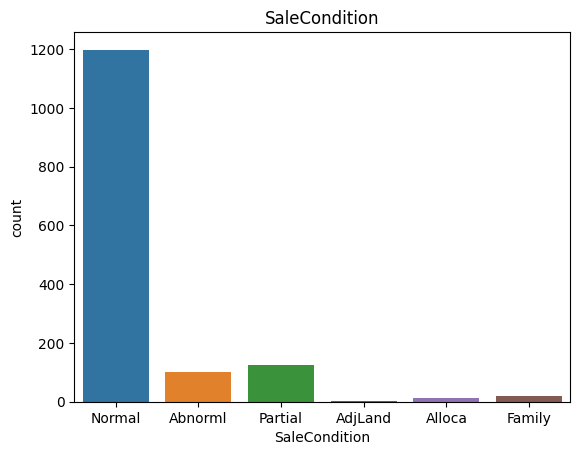

In [ ]:
sns.countplot(x = df_house['SaleCondition'])
plt.title("SaleCondition")
plt.show()

Gráfico circular:

<Axes: ylabel='SaleCondition'>

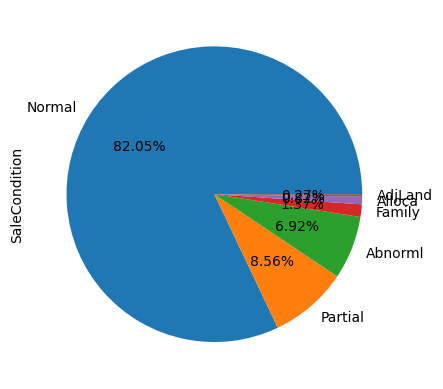

In [ ]:
df_house['SaleCondition'].value_counts().plot.pie(autopct = '%1.2f%%')

# 7.Análisis bivariante o multivariante

Analizamos la columna **Neighborhood** frente a **OverallQual**, para ello haremos un conteo por las dos variables con la función `groupby` y la variable de agregación `count`:

In [ ]:
df_house.groupby(['Neighborhood', 'OverallQual'])['OverallQual'].count()

Neighborhood  OverallQual
Blmngtn       7               14
              8                3
Blueste       6                2
BrDale        5                5
              6               11
BrkSide       1                1
              2                1
              3                3
              4               10
              5               21
              6               18
              7                4
ClearCr       4                3
              5                6
              6               10
              7                9
CollgCr       4                1
              5               28
              6               24
              7               71
              8               23
              9                3
Crawfor       4                1
              5               11
              6               19
              7               13
              8                7
Edwards       1                1
              3                5
              4  

Vemos que hay vecindarios con inmuebles con muy buenas condiciones de calidad en general, y otros que tienen todo tipo de inmuebles.

En el siguiente diagrama de puntos vemos la representación gráfica de las condiciones de calidad de los inmuebles por vecindario.

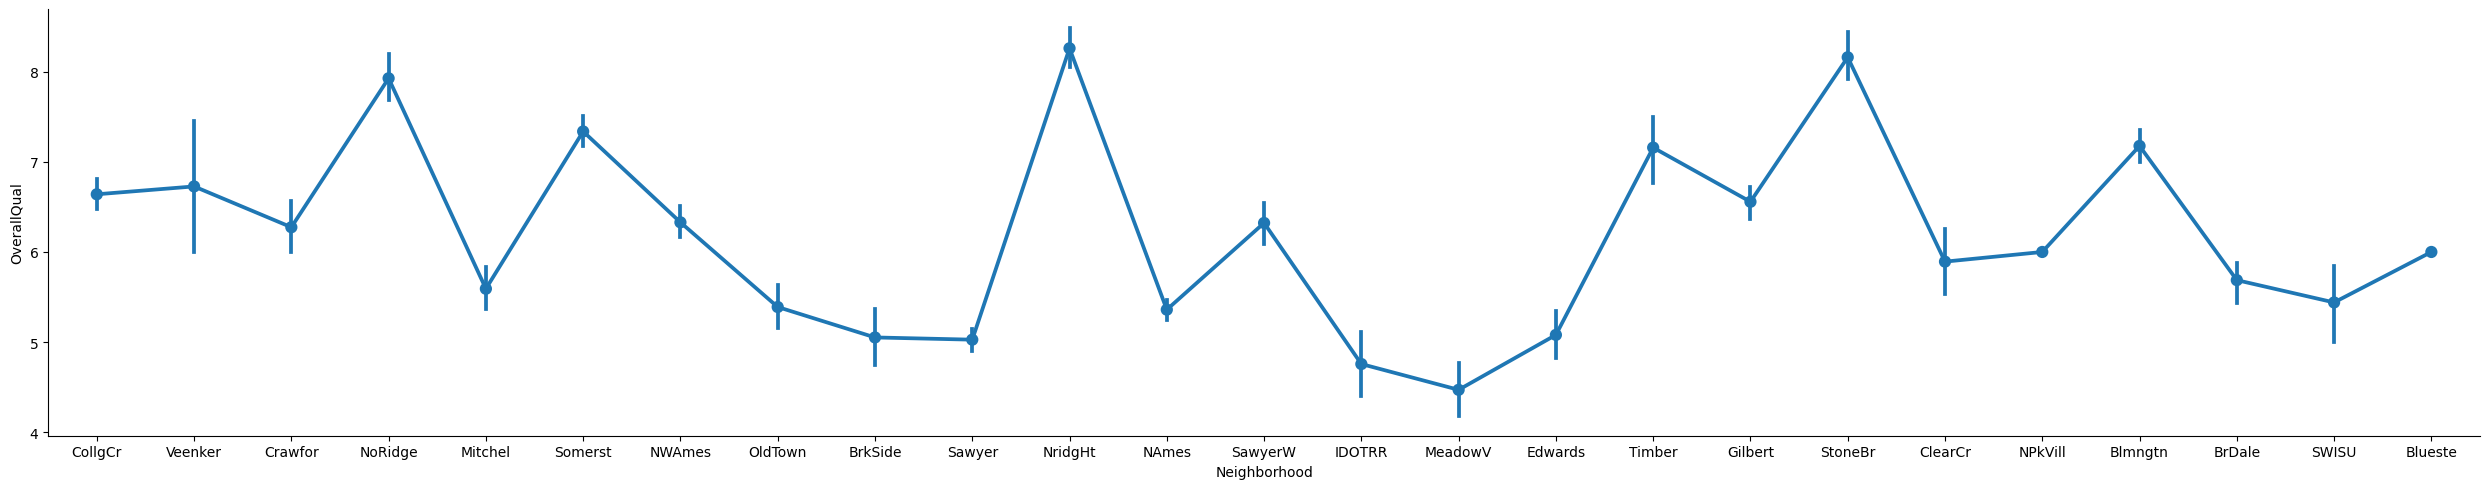

In [ ]:
sns.catplot(x='Neighborhood', y='OverallQual', data=df_house, kind='point', height=5, aspect=5)

En el siguiente diagrama de puntos vemos la representación gráfica del precio de los inmuebles por vecindario.

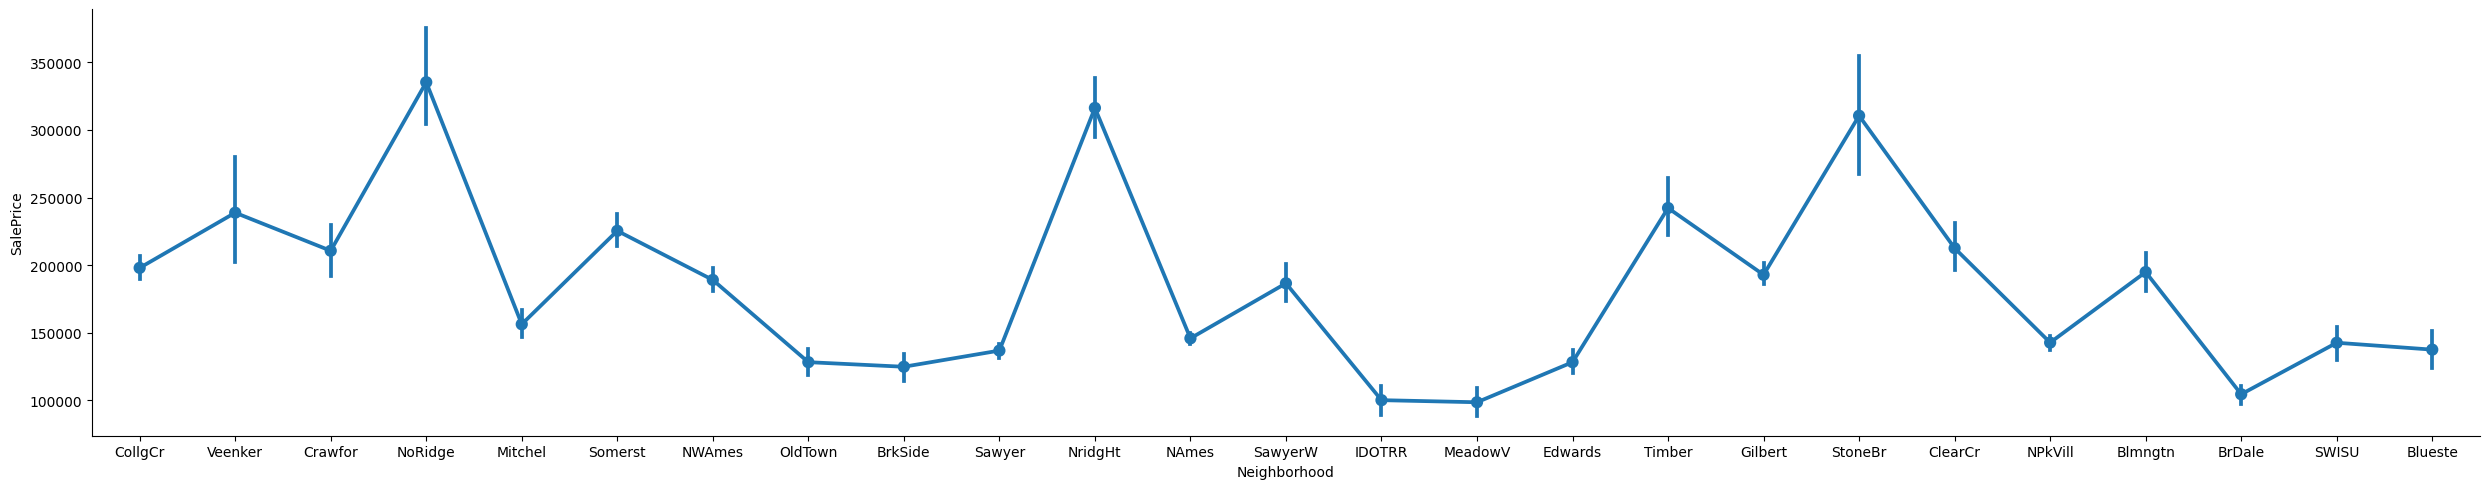

In [ ]:
sns.catplot(x='Neighborhood', y='SalePrice', data=df_house, kind='point', height=5, aspect=5)

Histograma que relaciona las condiciones de calidad de los inmuebles en una escala de 1 a 10, versus el precio de venta.

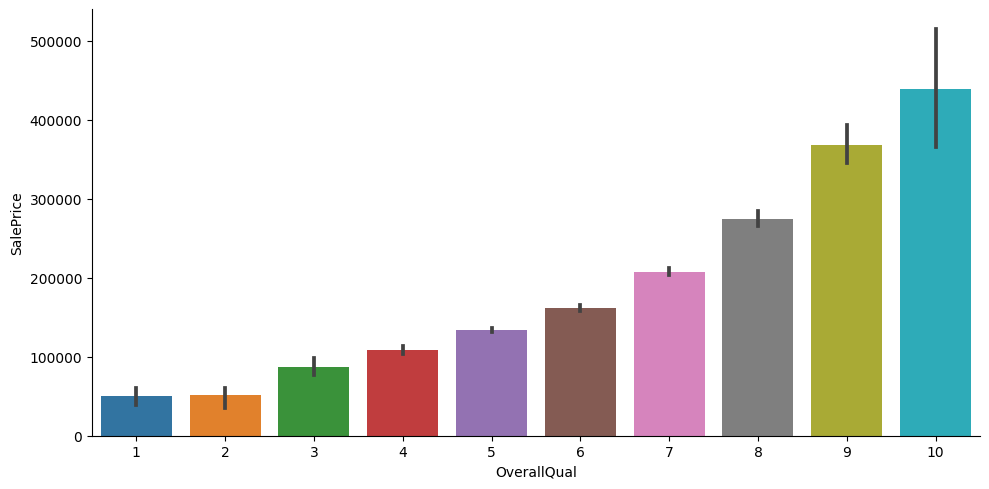

In [ ]:
sns.catplot(x='OverallQual', y='SalePrice', data=df_house, kind='bar', height=5, aspect=2)

Ahora con un diagrama boxplot.

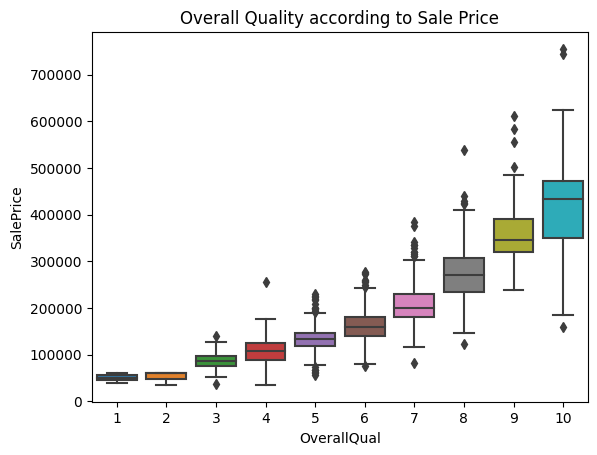

In [ ]:
ax = sns.boxplot(x="OverallQual", y="SalePrice",
                data=df_house)
plt.title("Overall Quality according to Sale Price", fontsize=12);

Ahora continuamos con el análisis de densidad bivariante en donde enfrentamos las variables de **SalePrice** (numérica) y **SaleCondition** (categórica).

Podemos ver que casi todas las categorías de **SaleCondition** caen alrededor de la media, exceptor por la categoría **Partial**.

In [ ]:
df_house["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

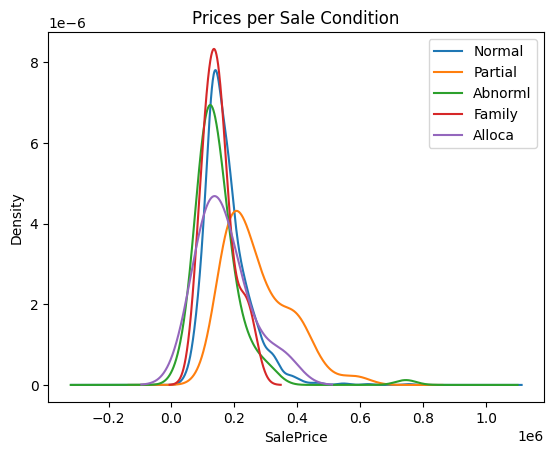

In [ ]:
df_house.SalePrice[df_house['SaleCondition'] == 'Normal'].plot(kind='kde')
df_house.SalePrice[df_house['SaleCondition']  == 'Partial'].plot(kind='kde')
df_house.SalePrice[df_house['SaleCondition']  == 'Abnorml'].plot(kind='kde')
df_house.SalePrice[df_house['SaleCondition']  == 'Family'].plot(kind='kde')
df_house.SalePrice[df_house['SaleCondition']  == 'Alloca'].plot(kind='kde')

plt.xlabel("SalePrice")
plt.title("Prices per Sale Condition")
plt.legend(('Normal', 'Partial','Abnorml','Family', 'Alloca'),loc='best');